In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import re
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



In [4]:
train_data = pd.read_csv('E:\\DataScience\\Titanic\\train.csv')
test_data = pd.read_csv('E:\\DataScience\\Titanic\\test.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.shape

(891, 12)

In [8]:
#check for null values in the data
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

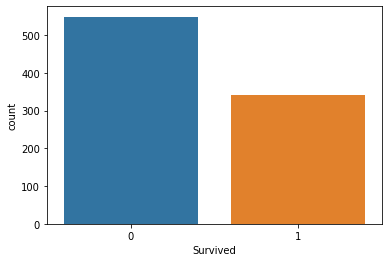

In [16]:
#Check the number of people that survived
sns.countplot(x = 'Survived',  data = train_data);

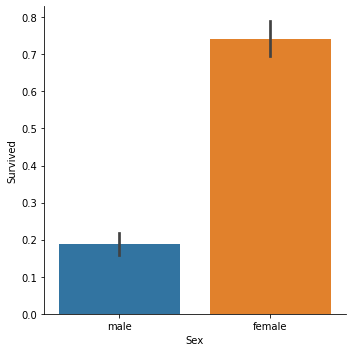

In [14]:
#check the sexes in terms of survival rate.
sns.catplot(x = 'Sex', y = 'Survived',kind= 'bar',data = train_data);

In [30]:
print(train_data.groupby(['Survived','Sex'])['Survived'].count())

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64


In [20]:
train_data.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [32]:
#Get the chances of survival of the sexes.
print(train_data[train_data.Sex == 'female'].Survived.sum()/train_data[train_data.Sex=='female'].Survived.count())
print(train_data[train_data.Sex == 'male'].Survived.sum()/train_data[train_data.Sex =='male'].Survived.count())

0.7420382165605095
0.18890814558058924


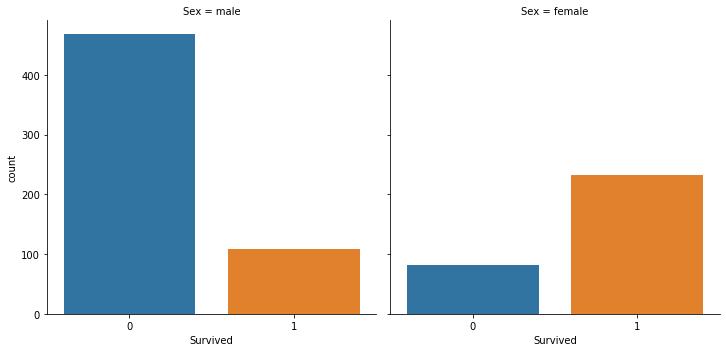

In [34]:
sns.catplot(x='Survived',col='Sex',kind='count',data= train_data)

##### There is a higher chance of Females surviving that their male counterparts.74% survival rating as compared to 18%

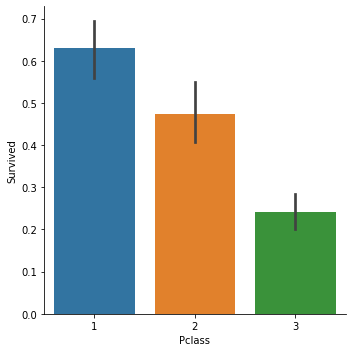

In [15]:
#check the survival rate in regards to the cabin class.
sns.catplot(x= 'Pclass', y='Survived',kind='bar', data = train_data);

##### The people in the higher class cabins had a higher survival rate.More money,higher survival.🤣🤣🤣

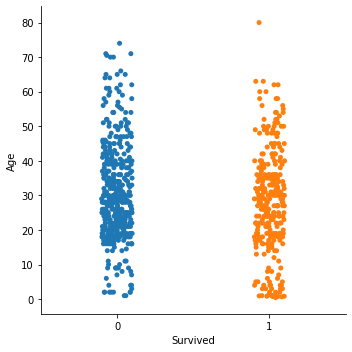

In [19]:
#check the age group vs survival rate
sns.catplot(x='Survived',y='Age',data=train_data)

### Our Model

In [35]:
# store the target variable which is survivors in a safe place to be sued later
Survived_train = train_data.Survived

In [36]:
# join the training and testing datasets.
total_data = pd.concat([train_data.drop(['Survived'],axis=1), test_data])

In [37]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


##### there are two number variables that are missing values  i.e fare and Age.so we will input these values.

In [38]:
total_data['Age'] = total_data.Age.fillna(total_data.Age.median())
total_data['Fare'] = total_data.Fare.fillna(total_data.Fare.median())
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


##### Encode the data with numbers because most machine learning models require numerical input.We use pandas function get_dummies.

In [39]:
total_data = pd.get_dummies(total_data,columns=['Sex'],drop_first = True)
total_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [40]:
total_data = total_data[['Sex_male', 'Fare', 'Age','Pclass','SibSp']]
total_data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


##### Split the data back to training and testing data

In [44]:
training_data = total_data.iloc[:891].values
testing_data = total_data.iloc[891:].values

In [45]:
X= training_data
y= Survived_train.values

##### Use Decision Tree Classifier 

In [53]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf= clf.fit(x,y)

In [54]:
print(clf.score(x,y))

0.8271604938271605


#### save  predictions

In [52]:
My_predictions = clf.predict(testing_data)
test_data['Survived'] = My_predictions
test_data[['PassengerId', 'Survived']].to_csv('1st_dec_tree.csv', index=False)